<a href="https://colab.research.google.com/github/diamondleng/Class_Project/blob/main/ABTesting_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AB testing**

Generate 100000 dice rolling results

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
random_data = np.random.randint(1, 7, 100000)
print(random_data.mean()) 
print(random_data.std()) 

3.49443
1.7060155260430663


In [ ]:
print(random_data[0:100])

[5 1 3 3 1 6 2 3 2 4 4 6 6 2 4 4 6 2 1 2 2 6 2 2 2 2 6 1 1 4 4 2 5 5 5 6 5
 2 3 5 5 4 1 5 6 5 4 2 1 1 4 3 3 4 3 6 4 1 3 6 1 5 2 3 6 3 1 5 4 2 5 4 4 5
 1 6 2 1 6 5 4 6 4 2 1 5 6 2 3 2 4 5 1 2 1 3 5 6 3 2]


In [ ]:
sample1 = []
for i in range(0, 10):
    sample1.append(random_data[int(np.random.random() * len(random_data))])

print(sample1)

[6, 2, 2, 4, 2, 6, 4, 4, 6, 2]


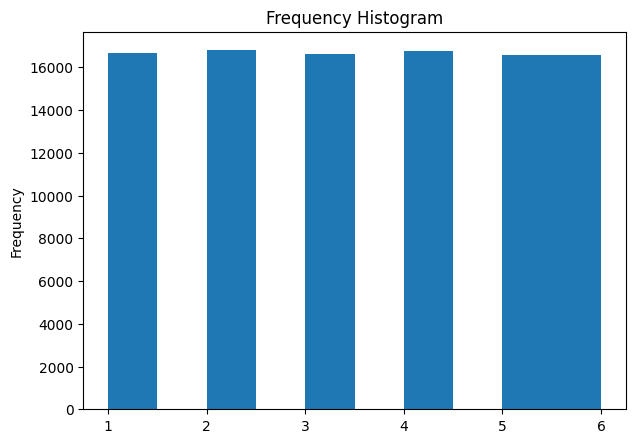

In [ ]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.hist(random_data)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


In [ ]:
np.mean(sample1)

3.8

In [ ]:
np.std(sample1)

1.6613247725836149

CLT Central Limit Theorem 

In [ ]:
samples = []
samples_mean = []
samples_std = []

for i in range(0, 1000):
    sample = []
    for j in range(0, 50):
        sample.append(random_data[int(np.random.random() * len(random_data))])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)

samples_mean_np = np.array(samples_mean)
samples_std_np = np.array(samples_std)

print(samples_mean_np)

[3.46 3.58 3.6  3.12 3.24 3.24 3.06 3.52 3.48 2.96 3.72 3.3  3.38 3.16
 3.62 3.54 3.82 3.28 3.56 3.36 3.8  3.56 4.02 3.16 3.94 3.6  3.64 3.44
 3.42 3.64 3.3  3.54 3.32 3.12 3.08 3.7  3.56 3.2  3.46 3.26 3.9  3.36
 3.5  3.5  3.6  3.18 3.54 3.4  3.72 3.68 3.3  3.58 3.26 3.18 3.36 3.4
 3.4  3.22 3.46 3.16 3.26 3.22 3.5  3.74 3.68 3.18 3.2  3.14 3.64 3.08
 3.82 3.82 3.3  3.36 3.32 3.48 3.56 3.34 3.74 3.36 3.5  3.68 3.46 3.62
 3.5  3.16 3.12 3.8  3.34 3.26 3.54 3.68 3.74 3.52 3.4  3.84 3.62 3.66
 3.98 3.6  3.56 3.62 3.34 3.18 3.16 3.34 3.46 3.62 3.32 3.46 3.38 3.5
 3.84 3.74 3.18 3.46 3.42 3.5  3.4  3.88 3.28 3.56 3.7  3.54 3.34 3.06
 3.68 3.12 3.68 4.   3.7  3.32 3.1  3.24 3.52 3.62 3.12 4.1  3.62 3.34
 3.52 3.72 3.58 4.06 3.52 3.42 3.86 3.58 3.58 3.22 3.3  2.96 3.66 3.42
 3.5  3.52 3.44 3.72 3.42 3.24 3.36 3.26 3.14 3.32 3.42 3.6  3.28 3.62
 3.26 3.84 3.5  3.18 3.54 3.54 3.8  3.02 3.32 3.44 3.34 3.6  3.44 3.54
 3.46 3.48 3.98 3.34 3.16 3.14 3.56 3.44 3.9  3.78 3.34 3.72 3.44 3.5
 3.5  3.5

In [ ]:
samples_mean_mean = samples_mean_np.mean()
print(samples_mean_mean)
samples_mean_std = samples_mean_np.std()
print(samples_mean_std)

3.4942999999999995
0.24361590670561722


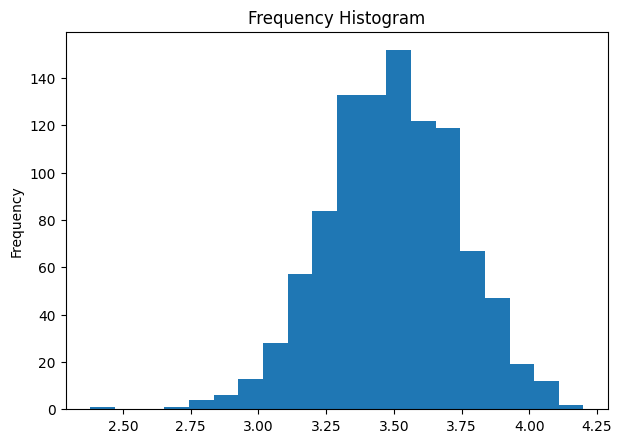

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
#x = np.random.normal(size = 1000)
plt.hist(samples_mean_np, bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');


AB Testing examples

In [ ]:
from scipy.stats import norm 
norm.cdf(-0.632)

0.2636934386118963

In [ ]:
from scipy.stats import norm 
norm.cdf(-2)

0.022750131948179195

In [ ]:
from scipy.stats import t
alpha = 0.05
t_stat = 2
df = 200
p = (1-t.cdf(abs(t_stat),df))*2
print("p value:", p)

p value: 0.04685318618707113


In [ ]:

norm.cdf(-1.18)


0.11900010745520073

In [ ]:
norm.cdf(-3.6)


0.00015910859015753364

In [ ]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
  
# 随机产生 50 个session length having mean 102

mean_Session_length = 101
sd_Session_length = 15/math.sqrt(50)
alpha =0.05

Nathan_Default_mean =100
data = sd_Session_length*randn(50)+mean_Session_length
print(data)

# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. 
  
ztest_Score, p_value= ztest(data,value = Nathan_Default_mean, alternative='larger')

print("ztest_Score =", ztest_Score)
print("p_value =", p_value)
alpha = 0.05
if p_value > alpha:
	print('Cant reject null hypothesis - Lets assume they are the same.')
else:
	print('Reject the null hypothesis that the means are equal.  - They are different')

[106.4322051  103.70980017  97.16762967 100.2602163   99.76756987
 100.8650297   99.68535878  94.32525019 101.1416062   98.29259762
 101.64012297 101.54482284 101.06910166  99.67500825 101.77139826
  99.42051027  99.83966256 101.4705942  102.402695   102.57424685
 103.24894331 100.47304664  98.29013841 100.10156891  99.60827937
 100.26461537  97.99940053 101.75135611 100.28194175 106.58870781
 105.36776644 103.46959049 103.61504693 100.38554613 100.85661065
 104.70460361 100.14298766 100.13853304 102.78935898 102.16942304
 100.2641114   97.09682215 102.18868516 102.3963739  100.50449103
  96.87210857  99.49091193  99.65878833  96.89832653  98.31445541]
mean=100.78 stdv=2.41
ztest_Score = 2.2648834018700277
p_value = 0.011759917794580283
Reject the null hypothesis that the means are equal.  - They are different


In [ ]:
import numpy as np
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
mean_Session_length = 101
sd_Session_length = 15/math.sqrt(50)

data = sd_Session_length*randn(50)+mean_Session_length
print(data)
alpha = 0.05

Nathan_Default_mean =100
# one sample t-test
# null hypothesis: expected value = Nathan_Default_mean
t_statistic, p_value = ttest_1samp(data, Nathan_Default_mean)

print("one-sample t-test, p value=", p_value)
if p_value > alpha:
	print('Cant reject null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal. - They are different')

[ 99.78640333  99.16668029 102.17938838  98.46516311 100.76997672
 104.73091313 101.54450853 100.47335521 101.54562197 101.08154622
  99.71436041 101.16718357 102.8508798  100.86018818  98.8778863
 101.59682402  99.24806331 100.91942261  97.64301726 101.25323998
 101.89746945 100.57811671  96.24945342  99.23262481  98.68253058
 101.00874092  99.06339397 103.91492693 100.6888331  101.29516671
 100.99342237 101.06635254 101.8229204   99.68073274 101.58516025
  99.84499068 103.76225991  98.92355949  96.5258395  101.75189396
  98.15245234 100.96604372 103.22094932  98.65274685 103.03732359
 100.75890239 100.98071203  98.52113484 101.0793835  101.55356105]
one-sample t-test, p value= 0.023127418054230738
Reject the null hypothesis that the means are equal. - They are different


In [ ]:
group1 = 5 * randn(100) 
group2 = 5 * randn(100) 
t_statistic, p_value = ttest_ind(group1, group2)
alpha = 0.05
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print("two-sample t-test p value", p_value)
if p_value > alpha:
	print('Cant Reject null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal. - They are different')

two-sample t-test p value 0.5499260841732505
Cant Reject null hypothesis that the means are equal.


In [ ]:
#Another t test example:

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
from scipy.stats import sem


# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# calculate the t test
df = len(data1) + len(data2) - 2
alpha = 0.05

mean1, mean2 = mean(data1), mean(data2)

se1, se2 = sem(data1), sem(data2)

sed = sqrt(se1**2.0 + se2**2.0)

t_stat = (mean1 - mean2) / sed

df = len(data1) + len(data2) - 2
	# calculate the critical value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0

print('t=%.3f, df=%d,  p=%.3f' % (t_stat, df,  p))

# interpret via p-value
if p > alpha:
	print('Cant reject null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-2.262, df=198,  p=0.025
Reject the null hypothesis that the means are equal.


In [ ]:
from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize as es
 
zt_ind_solve_power(effect_size=es(prop1=0.1, prop2=0.12), alpha=0.05, power=0.8, alternative="two-sided")


3834.595739884031

In [ ]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
#table = [	[90, 165],[84,  307]]
table = [	[90, 165, 34],[84,  307, 65]]
print(table)
U, p, dof, expected = chi2_contingency(table, correction=False)
print(U)
print(p)
print('dof=%d' % dof)
print(expected)


# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to# reject H0)')

[[90, 165, 34], [84, 307, 65]]
16.003556618937814
0.00033486660165148337
dof=2
[[ 67.49798658 183.09798658  38.40402685]
 [106.50201342 288.90201342  60.59597315]]
significance=0.050, p=0.000
Dependent (reject H0)
